### Answers for Assignment 9 - Statistics and Interactive Visualization

Complete the tasks below. Please turn in a single Jupyter notebook named `9_first_last.ipynb` (substitute your first and last name). Please run Kernel > Restart & Run All on your notebook before turning in.

**1.** Student survey data wrangling.

* Download the student survey data from [2015](https://raw.githubusercontent.com/cuttlefishh/python-for-data-analysis/master/data/survey_scores_2015_T.csv) and [2018](https://raw.githubusercontent.com/cuttlefishh/python-for-data-analysis/master/data/survey_scores_2018.csv) if you don't have them already.
* Import the csv files as DataFrames and inspect the files. Notice that the data are formatted differently. Next you will modify them so they are compatible.
* The 2015 data is mostly ready to go. Just convert the Y/N values to True/False (boolean).
* The 2018 data needs a lot of work. Delete the 'Timestamp' and 'Graduate program and advisor' columns. Rename the remaining columns to match those in 2015. Convert the Yes/No values to True/False (boolean). Convert the None/Some/Moderate/Experienced values to 0/1/2/3 (integers). 

**2.** Statistical analysis.

* In both years, some students have Macs and some have Windows computers. Test the hypothesis that the proportions of Mac and Windows users are the same in 2015 and 2018. Note that in 2018, the question was asked differently and some people listed multiple operating systems; for the purposes of this question, assume that SDNT6 and SDNT10 have Windows computers and SDNT7 has a Mac.
* For each of the 'score' columns shared by both datasets (there are five), use a two-sample *t*-test to determine if the two samples have equal means. Note: To use `scipy.stats`, you may have to import it directly like so: `from scipy import stats`.

**3.** Stock data.

* Download historical stock data from the past three years for a stock of your choice (look up the symbol) and the S&P 500 index (symbol: 'SPX'). Use Panads timeseries operations to calculate the start and end dates. Morningstar seems to be the most reliable source of data (see pandas-datareader [docs](https://pydata.github.io/pandas-datareader/stable/remote_data.html)). However, note that using Morningstar will return a hierarchical index, where the first index is the stock symbol and the second index is the date. For example, to download stock data for Qualcomm and Illumina and see the data for Qualcomm, use these commands, where `start` and `end` are Pandas datatime objects: 

        import pandas_datareader as pdr
        quotes = pdr.data.DataReader(['QCOM', 'ILMN'], 'morningstar', start, end)
        quotes.loc['QCOM']

* Calculate the 52-week high and low for the past year for your stock and for the S&P 500.
* Plot the price at close over the past three years of your stock and the S&P 500. Use a dual y-axis (using `twinx` like we learned in the Matplotlib lesson) to display the two prices side by side on separate scales.
* Calculate the percent change from three years ago for both prices. How did your stock perform relative to the S&P 500?

**4.** Bokeh visualization.

* Use Bokeh to create an interactive visualization of the stock data you downloaded in Question 3. The HTML file that is generated should use the default content delivery network; i.e., it requires an internet connection to render properly.
* Use Bokeh to create an interactive visualization from a dataset of your choice. You can choose one of the datasets from a previous assignment (e.g., precipitation in La Jolla, moons of the Solar System, or the Earth Microbiome Project) or your own dataset. The HTML file that is generated should be a stand-alone file (`mode=inline`) that does not require an internet connection to render properly.

**5.** Final project proposal.

* The final project description is [here](https://github.com/cuttlefishh/python-for-data-analysis/blob/master/assignments/final_project.md). Write a short paragraph describing your proposed idea for the final project: the dataset you want to use, what analysis you want to do, and what you hope your code will do and look like when you are done. I will provide feedback when I grade your assignment. If you would like feedback sooner, please email me directly.

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
%matplotlib inline

#### Question 1 - Student survey data wrangling

Download the student survey data from [2015](https://raw.githubusercontent.com/cuttlefishh/python-for-data-analysis/master/data/survey_scores_2015_T.csv) and [2018](https://raw.githubusercontent.com/cuttlefishh/python-for-data-analysis/master/data/survey_scores_2018.csv) if you don't have them already. Import the csv files as DataFrames and inspect the files. Notice that the data are formatted differently. Next you will modify them so they are compatible.

In [2]:
df15 = pd.read_csv('../../data/survey_scores_2015_T.csv')
df18 = pd.read_csv('../../data/survey_scores_2018.csv')

In [3]:
df15

,subject_id,computer_has,computer_os,score_bash,score_command,score_matlab,score_perl,score_python,score_r
0,10000,N,NaN,0,0,0,0,0,0
1,13001,Y,Mac,1,2,3,0,0,0
2,60985,Y,Windows,0,1,1,0,2,1
3,43309,Y,Mac,3,3,0,0,1,2
4,89785,Y,Windows,2,2,0,1,2,2
5,57688,Y,Mac,1,1,1,0,0,0
6,19366,Y,Mac,0,2,3,0,0,2
7,97775,Y,Mac,2,2,3,0,1,0
8,22384,Y,Windows,0,0,2,0,0,2
9,31556,Y,Mac,1,2,3,0,0,0


In [4]:
df18

,Timestamp,Respondent,Graduate program and advisor,Do you have your own laptop?,Which operating system do you run on your computer? (You may select more than one if you have multiple disk partitions or a virtual machine.),What is your experience level with the command line?,What is your experience level with the R programming language?,What is your experience level with the MATLAB programming language?,What is your experience level with the Perl programming language?,What is your experience level with the Python programming language?
0,1/9/2018 9:57:18,SDNT1,PhD: SIO: Jennifer Smith,Yes,Mac,Some,Moderate,None,None,Some
1,1/9/2018 9:57:53,SDNT2,PhD: SIO/Marine Biology: Lyons Lab,Yes,Mac,Some,None,None,None,Some
2,1/9/2018 9:59:14,SDNT3,PhD: SIO/Biological Oceanography: Jeff Bowman,Yes,Mac,None,None,None,None,None
3,1/9/2018 9:59:15,SDNT4,PhD: Structural Engineering: Hyonny Kim,Yes,Mac,Moderate,None,Experienced,None,Some
4,1/9/2018 9:59:36,SDNT5,MS: SIO/Marine Biology: Douglas Bartlett,Yes,Mac,None,None,Some,None,None
5,1/9/2018 9:59:38,SDNT6,"PhD: SIO/Physical Oceanography, Uwe Send",Yes,"Windows, Unix",Moderate,None,Experienced,Some,None
6,1/9/2018 10:00:03,SDNT7,PhD: Economics: Dan Cayan,Yes,"Mac, Windows, Unix",Moderate,Experienced,Some,Some,Some
7,1/9/2018 10:00:21,SDNT8,PhD: Engineering Physics: Alexey Arefiev,Yes,Mac,Moderate,None,Experienced,None,None
8,1/9/2018 10:01:22,SDNT9,PhD: Geophysics: Dave Stegman,Yes,Mac,Some,None,Some,None,Some
9,1/9/2018 11:13:57,SDNT10,Postdoc: NOAA/SWFSC: Andrew Thompson,Yes,"Windows, Unix",None,Moderate,Some,None,None


The 2015 data is mostly ready to go. Just convert the Y/N values to True/False (boolean).

In [5]:
df15.computer_has = df15.computer_has.map({'Y': True, 'N': False})

The 2018 data needs a lot of work. Delete the 'Timestamp' and 'Graduate program and advisor' columns. Rename the remaining columns to match those in 2015. Convert the Yes/No values to True/False (boolean). Convert the None/Some/Moderate/Experienced values to 0/1/2/3 (integers). 

In [6]:
df18.drop(['Timestamp', 'Graduate program and advisor'], axis=1, inplace=True)

In [7]:
df18.columns = ['subject_id', 'computer_has', 'computer_os', 'score_command', 
                'score_r', 'score_matlab', 'score_perl', 'score_python']

In [8]:
df18.computer_has = df18.computer_has.map({'Yes': True, 'N0': False})

In [9]:
for i in ['score_command', 'score_r', 'score_matlab', 'score_perl', 'score_python']:
    df18[i] = df18[i].map({'None': 0, 'Some': 1, 'Moderate': 2, 'Experienced': 3})

#### Question 2 - Statistical analysis

In both years, some students have Macs and some have Windows computers. Test the hypothesis that the proportions of Mac and Windows users are the same in 2015 and 2018. Note that in 2018, the question was asked differently and some people listed multiple operating systems; for the purposes of this question, assume that SDNT6 and SDNT10 have Windows computers and SDNT7 has a Mac.

<span style='color:red'>We can use a Fisher's exact test. We want a DataFrame where the columns are observations (Mac, Windows) and the rows are trials (2015, 2018).</span>

In [10]:
df15.computer_os.value_counts()

Mac        8
Windows    3
Linux      2
Name: computer_os, dtype: int64

In [11]:
df18['comp'] = [x.split(', ')[0] for x in df18.computer_os]
df18['comp'].value_counts()

Mac        9
Windows    3
Name: comp, dtype: int64

In [12]:
df_comp = pd.DataFrame([[8, 3],[9, 3]],
                       index=['2015', '2018'],
                       columns=['Mac', 'Windows'])
df_comp

,Mac,Windows
2015,8,3
2018,9,3


In [13]:
odds_ratio, p_value = scipy.stats.fisher_exact(df_comp, alternative='two-sided')
odds_ratio, p_value

(0.88888888888888884, 1.0)

<span style='color:red'>Answer: The proportion of Mac vs. Windows users in the two years is statistically the same.</span>

For each of the 'score' columns shared by both datasets (there are five), use a two-sample *t*-test to determine if the two samples have equal means. Note: To use `scipy.stats`, you may have to import it directly like so: `from scipy import stats`.

In [14]:
for i in ['score_command', 'score_r', 'score_matlab', 'score_perl', 'score_python']:
    print(df15[i].var(), df18[i].var())

0.862637362637 0.727272727273
0.994505494505 1.11363636364
1.49450549451 1.53787878788
0.131868131868 0.151515151515
0.554945054945 0.265151515152


<span style='color:red'>We should treat the variances as unequal.</span>

In [15]:
for i in ['score_command', 'score_r', 'score_matlab', 'score_perl', 'score_python']:
    t, p = scipy.stats.ttest_ind(df15[i], df18[i], equal_var=False)
    print('%s\t%s\t%s' % (i, t, p))

score_command	1.02156374646	0.317232284229
score_r	0.441167130032	0.663225440595
score_matlab	0.712312837331	0.483347689787
score_perl	-0.160358347137	0.874011200171
score_python	0.239566104814	0.812782931635


<span style='color:red'>Answer: None of the means are different from each other with alpha = 0.05.</span>

#### Question 3 - Stock data

Download historical stock data from the past three years for a stock of your choice (look up the symbol) and the S&P 500 index (symbol: 'SPX'). Use Panads timeseries operations to calculate the start and end dates. Morningstar seems to be the most reliable source of data (see pandas-datareader [docs](https://pydata.github.io/pandas-datareader/stable/remote_data.html)). However, note that using Morningstar will return a hierarchical index, where the first index is the stock symbol and the second index is the date. For example, to download stock data for Qualcomm and Illumina and see the data for Qualcomm, use these commands, where `start` and `end` are Pandas datatime objects: 

        import pandas_datareader as pdr
        quotes = pdr.data.DataReader(['QCOM', 'ILMN'], 'morningstar', start, end)
        quotes.loc['QCOM']

In [16]:
start = pd.datetime.today() - pd.DateOffset(years=3) # exactly 3 years before today
end = pd.datetime.today() # today

In [17]:
quotes = pdr.data.DataReader(['TSLA', 'SPX'], 'morningstar', start, end)
quotes.head()

Close    High     Low    Open   Volume
Symbol Date                                               
TSLA   2015-03-09  190.88  194.49  188.25  194.43  6736724
       2015-03-10  190.32  193.50  187.60  188.40  5579691
       2015-03-11  193.74  196.18  191.01  191.15  4974871
       2015-03-12  191.07  194.45  189.75  193.75  4149294
       2015-03-13  188.68  191.75  187.32  188.89  5434298

Calculate the 52-week high and low for the past year for your stock and for the S&P 500.

In [18]:
one_year_ago = pd.datetime.today() - pd.DateOffset(years=1)

In [19]:
tsla_52wk = quotes.loc['TSLA'].loc[one_year_ago:end]
spx_52wk = quotes.loc['SPX'].loc[one_year_ago:end]

In [20]:
tsla_52wk.High.max(), tsla_52wk.Low.min()

(389.61000000000001, 242.78100000000001)

In [21]:
spx_52wk.High.max(), spx_52wk.Low.min()

(2872.0900000000001, 2322.25)

<span style='color:red'>Answer: The 52-week high and low of TSLA are 389.6 and 242.8, and for the S&P 500 are 2872 and 2322.</span>

Plot the price at close over the past three years of your stock and the S&P 500. Use a dual y-axis (using `twinx` like we learned in the Matplotlib lesson) to display the two prices side by side on separate scales.

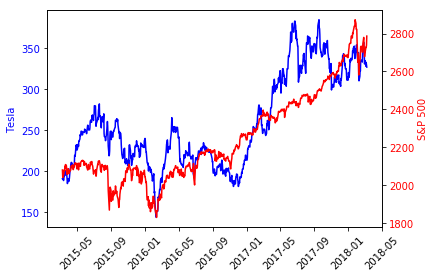

In [22]:
fig, ax1 = plt.subplots()

ax1.plot(quotes.loc['TSLA'].index, quotes.loc['TSLA'].Close, color='b')
ax1.set_ylabel('Tesla', color='b')
for label in ax1.get_yticklabels():
    label.set_color('b')

ax2 = ax1.twinx()
ax2.plot(quotes.loc['SPX'].index, quotes.loc['SPX'].Close, color='r')
ax2.set_ylabel('S&P 500', color='r')
for label in ax2.get_yticklabels():
    label.set_color('r')
    
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45);

Calculate the percent change from three years ago for both prices. How did your stock perform relative to the S&P 500?

In [23]:
def stock_return(quotes, symbol, t1, t2):
    price_t1 = quotes.loc[symbol].loc[t1].Close
    price_t2 = quotes.loc[symbol].loc[t2].Close
    return((price_t2 - price_t1)/price_t1)

In [24]:
stock_return(quotes, 'TSLA', start.date(), end.date())

0.71400880134115685

In [25]:
stock_return(quotes, 'SPX', start.date(), end.date())

0.34006488811452973

<span style='color:red'>Answer: Tesla was more volatile than the S&P 500, and it also had a greater return, 71% for TSLA compared with 34% for the S&P 500.</span>

#### Question 4 - Bokeh visualization

Use Bokeh to create an interactive visualization of the stock data you downloaded in Question 3. The HTML file that is generated should use the default content delivery network; i.e., it requires an internet connection to render properly.

In [26]:
output_file('stock_price_tsla_spx.html')

tools = 'pan, wheel_zoom, box_zoom, reset, save, hover, undo, redo'

p = figure(width=1000, height=600, x_axis_type='datetime', tools=tools, title='Tesla stock price and the S&P 500')

p.line(quotes.loc['TSLA'].index, quotes.loc['TSLA'].Close, color='blue', legend='TSLA')
p.line(quotes.loc['SPX'].index, quotes.loc['SPX'].Close, color='red', legend='S&P 500')

p.ygrid.band_fill_color='gray'
p.ygrid.band_fill_alpha = 0.1

p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Price'

show(p)

Use Bokeh to create an interactive visualization from a dataset of your choice. You can choose one of the datasets from a previous assignment (e.g., precipitation in La Jolla, moons of the Solar System, or the Earth Microbiome Project) or your own dataset. The HTML file that is generated should be a stand-alone file (`mode=inline`) that does not require an internet connection to render properly.

<span style='color:red'>I am choosing to create interactive plots of the moon data. First I import the data and generate the volume columns.</span>

In [27]:
df_moons = pd.read_excel('../../data/moons.xlsx')
df_planets = pd.read_excel('../../data/planets.xlsx')
df_solar = pd.merge(df_moons, df_planets, left_on='planet_name', right_on='planet_name')
df_solar['moon_volume_km3'] = 4/3*np.pi*(df_solar.moon_diameter_km/2)**3
df_solar['planet_volume_km3'] = 4/3*np.pi*(df_solar.planet_diameter_km/2)**3
df_solar

,moon_name,planet_name,moon_planet_distance_km,moon_diameter_km,planet_diameter_km,planet_sun_distance_km,planet_sun_distance_au,moon_volume_km3,planet_volume_km3
0,Moon,Earth,384000,3476,12742,1.495979e+08,1.000,2.199064e+10,1.083207e+12
1,Deimos,Mars,9270,20,6779,2.281368e+08,1.525,4.188790e+03,1.631156e+11
2,Phobos,Mars,23460,8,6779,2.281368e+08,1.525,2.680826e+02,1.631156e+11
3,Callisto,Jupiter,1883000,4800,139822,7.786569e+08,5.205,5.790584e+10,1.431282e+15
4,Europa,Jupiter,670900,3126,139822,7.786569e+08,5.205,1.599431e+10,1.431282e+15
5,Ganymede,Jupiter,1070000,5276,139822,7.786569e+08,5.205,7.689763e+10,1.431282e+15
6,Io,Jupiter,421600,3629,139822,7.786569e+08,5.205,2.502416e+10,1.431282e+15
7,Dione,Saturn,377400,1120,116464,1.427912e+09,9.545,7.356186e+08,8.271299e+14
8,Enceladus,Saturn,238020,498,116464,1.427912e+09,9.545,6.466759e+07,8.271299e+14
9,Hyperion,Saturn,1481000,226,116464,1.427912e+09,9.545,6.043993e+06,8.271299e+14


In [28]:
colors = {
    'Mars': 'red',
    'Earth': 'blue',
    'Jupiter': 'orange',
    'Saturn': 'green',
    'Uranus': 'cyan',
    'Neptune': 'purple'}

<span style='color:red'>Now I generate an interactive scatter plot of the diameters, then an interactive plot of the volumes. Notice some modifications: 1) HoverTool shows the moon and planet names and values and the ratio of values. 2) Circles are sized by moon size, except a pseudocount of 5 has been added to each value so that Mars's tiny moons Phobos and Deimos are visible. 3) Circles are colored by planet.</span>

In [29]:
output_file('moon_diameter.html', mode='inline')

source = ColumnDataSource(data=dict(
    x=df_solar.planet_diameter_km,
    y=df_solar.moon_diameter_km,
    ratio=df_solar.moon_diameter_km/df_solar.planet_diameter_km,
    planet=df_solar.planet_name,
    moon=df_solar.moon_name,
    size=df_solar.moon_diameter_km/200 + 5,
    color=[colors[x] for x in df_solar.planet_name]
))

hover = HoverTool(tooltips=[
    ("moon name", "@moon"),
    ("moon diameter", "@y"),
    ("planet name", "@planet"),
    ("planet diameter", "@x"),
    ("ratio", "@ratio")
])

tools = [hover, 'pan, wheel_zoom, box_zoom, reset, save, undo, redo']

p = figure(width=1000, height=600, tools=tools, title='Moons of the Solar System, by diameter')

p.circle(x='x', y='y', size='size', fill_color='color', line_color='black', source=source)

p.xaxis.axis_label = 'Planet diameter (km)'
p.yaxis.axis_label = 'Moon diameter (km)'

show(p)

In [30]:
output_file('moon_volume.html', mode='inline')

source = ColumnDataSource(data=dict(
    x=df_solar.planet_volume_km3,
    y=df_solar.moon_volume_km3,
    ratio=df_solar.moon_volume_km3/df_solar.planet_volume_km3,
    planet=df_solar.planet_name,
    moon=df_solar.moon_name,
    size=df_solar.moon_diameter_km/200 + 5,
    color=[colors[x] for x in df_solar.planet_name]
))

hover = HoverTool(tooltips=[
    ("moon name", "@moon"),
    ("moon volume", "@y"),
    ("planet name", "@planet"),
    ("planet volume", "@x"),
    ("ratio", "@ratio")
])

tools = [hover, 'pan, wheel_zoom, box_zoom, reset, save, undo, redo']

p = figure(width=1000, height=600, tools=tools, title='Moons of the Solar System, by volume')

p.circle(x='x', y='y', size='size', fill_color='color', line_color='black', source=source)

p.xaxis.axis_label = 'Planet volume (km^3)'
p.yaxis.axis_label = 'Moon volume (km^3)'

show(p)